In [1]:
%matplotlib inline
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# File to Load, read
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
pyber_data = pd.merge(city_data, ride_data, on=["city"])
# Display the data table for preview
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
#Avg Fare for city types
city_group=pyber_data.groupby(["city","type"])
avg_fare=city_group["fare"].mean().reset_index()
avg_fare_city_type=avg_fare.set_index('type')
avg_fare_urban=avg_fare_city_type.loc["Urban"]
avg_fare_rural=avg_fare_city_type.loc["Rural"]
avg_fare_suburban=avg_fare_city_type.loc["Suburban"]

#Rides per city
ride_count=city_group['ride_id'].count().reset_index()
ride_count_city_type=ride_count.set_index('type')
ride_count_urban=ride_count_city_type.loc["Urban"]
ride_count_rural=ride_count_city_type.loc["Rural"]
ride_count_suburban=ride_count_city_type.loc["Suburban"]

#total number of drivers per city
drivers=city_data[["city","driver_count","type"]]
drivers_city_type=drivers.set_index('type')
drivers_urban=drivers_city_type.loc["Urban"]
drivers_rural=drivers_city_type.loc["Rural"]
drivers_suburban=drivers_city_type.loc["Suburban"]

## Bubble Plot of Ride Sharing Data

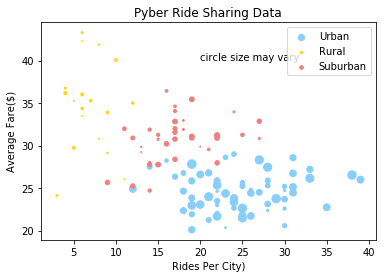

In [3]:
# Obtain the x and y coordinates for each of the three city types
x_axis_urban= ride_count_urban['ride_id']
y_axis_urban= avg_fare_urban['fare']

x_axis_rural= ride_count_rural['ride_id']
y_axis_rural= avg_fare_rural['fare']

x_axis_suburban= ride_count_suburban['ride_id']
y_axis_suburban= avg_fare_suburban['fare']



plt.show()
# Build the scatter plots for each city types
plt.scatter(x_axis_urban,y_axis_urban, color="lightskyblue",s=drivers_urban['driver_count'],alpha=1.0,
           label="Urban")
plt.scatter(x_axis_rural,y_axis_rural,color="gold", s=drivers_rural['driver_count'],alpha=1.0,
            label="Rural")
plt.scatter(x_axis_suburban,y_axis_suburban,color="lightcoral",s=drivers_suburban['driver_count'],
            alpha=1.0, label="Suburban")
# Incorporate the other graph properties
plt.xlabel("Rides Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data")
# Create a legend
plt.legend(loc="best")

# Incorporate a text label regarding circle size
plt.text(20,40,"circle size may vary")

# Save Figure
plt.savefig("data/PyberBubblePlot.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

In [14]:
# Calculate fare percents

total_fares=pyber_data["fare"].sum()
city_type=pyber_data.groupby('type')
total_fares_city_type=city_type.sum().reset_index()
print(total_fares_city_type)
type_index=total_fares_city_type.set_index('type')
rural_fare=type_index.loc[["Rural"],["fare"]]
rural_fare_percent=((rural_fare["fare"])/(total_fares)*100)
print(rural_fare_percent)
urban_fare=type_index.loc[["Urban"],["fare"]]
urban_fare_percent=((urban_fare["fare"])/(total_fares)*100)
print(urban_fare_percent)
suburban_fare=type_index.loc[["Suburban"],["fare"]]
suburban_fare_percent=((suburban_fare["fare"])/(total_fares)*100)
print(suburban_fare_percent)


       type  driver_count      fare           ride_id
0     Rural           537   4327.93   580968240341287
1  Suburban          8570  19356.33  3106884522576766
2     Urban         59602  39854.38  7919412664056093
type
Rural    6.811493
Name: fare, dtype: float64
type
Urban    62.724635
Name: fare, dtype: float64
type
Suburban    30.463872
Name: fare, dtype: float64


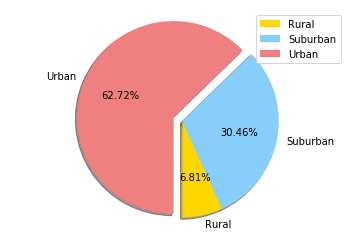

In [17]:
#Pie chart based on % Fares

fares_pie_chart = pyber_data.groupby(["type"])["fare"].sum()
fares_pie_chart
labels=fares_pie_chart.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(fares_pie_chart, labels = labels, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)
plt.axis("equal")
plt.legend(loc = "upper right")

In [31]:
# Save and show Figure
plt.savefig("data/PyberFaresPieChart.png")
plt.show()

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64
2375


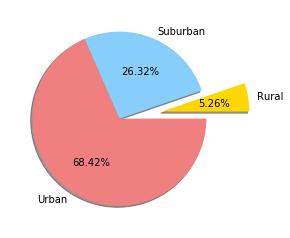

In [32]:
# Calculate Ride Percents

total_rides=pyber_data["ride_id"].count()
rides_pie_chart = pyber_data.groupby(["type"])["ride_id"].count()
print(rides_pie_chart)
print(total_rides)

# Build Pie Chart

labels = city_rides_pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.5,0,0)
plt.pie(rides_pie_chart, labels = labels, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)

# Save Figure
plt.savefig("data/PyberRidesPieChart.png")

In [33]:
# Show Figure
plt.show()

## Total Drivers by City Type

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64
2375


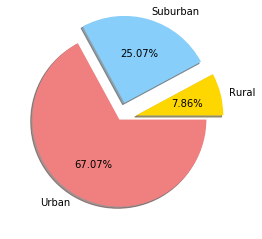

In [37]:
# Calculate Driver Percents

drivers_pie_chart = pyber_data.groupby(["type"])["driver_count"].mean()
print(drivers_pie_chart)
total_drivers=pyber_data["driver_count"].count()
print(total_drivers)

# Build Pie Charts

labels = drivers_pie_chart.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.2,0.2,0)
plt.pie(drivers_pie_chart, labels = labels, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)

# Save Figure
plt.savefig("data/PyberDriversPieChart.png")

In [38]:
# Show Figure
plt.show()